<a href="https://colab.research.google.com/github/ALRIER/Genetic_Algorithms/blob/main/Optimizing_Location_Estimators/Estimadores_con_GA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%%R

# Configura la librería de paquetes para que apunte a tu carpeta en Drive
.libPaths("/content/drive/MyDrive/Rpackages")


In [ ]:
%%R
# Ajustar .libPaths() para incluir el directorio de paquetes personalizado
.libPaths(c("/content/drive/MyDrive/Rpackages", .libPaths()))

# Lista de paquetes deseados
paquetes_deseados <- c("modeest","gamlss", "RelDists", "GA","statmod","gtools", "scales")

# Función para instalar paquetes si no están ya en la carpeta
instalar_si_no_existe <- function(paquetes) {
  # Asegurarse de que package_names esté actualizado con la configuración actual de .libPaths()
  installed.packages <- installed.packages()
  package_names <- installed.packages[, "Package"]

  for (paquete in paquetes) {
    if (!paquete %in% package_names) {
      message(paste("Instalando paquete:", paquete))
      install.packages(paquete, lib="/content/drive/MyDrive/Rpackages")
      # Actualizar la lista de paquetes instalados después de la instalación
      installed.packages <- installed.packages()
      package_names <- installed.packages[, "Package"]
    } else {
      message(paste("El paquete ya está instalado:", paquete))
    }
  }
}

# Ejecuta la función con tu lista de paquetes deseados
instalar_si_no_existe(paquetes_deseados)


Instalando paquete: modeest
also installing the dependencies ‘timeDate’, ‘timeSeries’, ‘gss’, ‘rmutil’, ‘clue’, ‘fBasics’, ‘stable’, ‘stabledist’, ‘statip’

trying URL 'https://cran.rstudio.com/src/contrib/timeDate_4041.110.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/timeSeries_4041.111.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/gss_2.2-9.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/rmutil_1.1.10.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/clue_0.3-66.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/fBasics_4041.97.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/stable_1.1.6.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/stabledist_0.7-2.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/statip_0.2.3.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/modeest_2.4.0.tar.gz'

The downloaded source packages are in
	‘/tmp/RtmpEmppUb/downloaded_packages’
El paquete ya está instalado: gamlss
El paquete 

In [ ]:
%%R
install.packages("RcppParallel", lib="/content/drive/MyDrive/Rpackages", dependencies=TRUE)


also installing the dependency ‘RUnit’

trying URL 'https://cran.rstudio.com/src/contrib/RUnit_0.4.33.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/RcppParallel_5.1.10.tar.gz'

The downloaded source packages are in
	‘/tmp/RtmpEmppUb/downloaded_packages’


In [ ]:
%%R
install.packages("lamW", lib="/content/drive/MyDrive/Rpackages", dependencies=TRUE)

also installing the dependencies ‘rex’, ‘covr’, ‘tinytest’

trying URL 'https://cran.rstudio.com/src/contrib/rex_1.2.1.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/covr_3.6.4.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/tinytest_1.4.1.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/lamW_2.2.4.tar.gz'

The downloaded source packages are in
	‘/tmp/RtmpEmppUb/downloaded_packages’
also installing the dependencies ‘gamlss.cens’, ‘V8’

trying URL 'https://cran.rstudio.com/src/contrib/gamlss.cens_5.0-7.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/V8_6.0.4.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/RelDists_1.0.0.tar.gz'

The downloaded source packages are in
	‘/tmp/RtmpEmppUb/downloaded_packages’
In addition: Warning messages:
1: In install.packages("lamW", lib = "/content/drive/MyDrive/Rpackages",  :
  installation of package ‘lamW’ had non-zero exit status
2: In install.packages("RelDists", lib = "/content/drive/MyDrive/Rpackages", 

##Cargando paquetes preinstalados

In [ ]:
%%R

cargar_paquetes <- function(paquetes) {
  # Asegura que la librería apunte a tu carpeta en Drive
  .libPaths("/content/drive/MyDrive/Rpackages")

  paquetes_instalados <- rownames(installed.packages(lib.loc = .libPaths()))

  for (paquete in paquetes) {
    if (paquete %in% paquetes_instalados) {
      # Si el paquete está instalado, intenta cargarlo
      library(paquete, character.only = TRUE)
      message(paste("Paquete cargado exitosamente:", paquete))
    } else {
      # Si el paquete no está instalado, envía un mensaje
      message(paste("Paquete no disponible:", paquete))
    }
  }
}
# Aquí estan los paquetes que quieres cargar
paquetes_para_cargar <- c("modeest","gamlss", "GA","statmod","gtools", "scales")
# Llama a la función con el vector de paquetes
cargar_paquetes(paquetes_para_cargar)


Paquete cargado exitosamente: modeest
Paquete no disponible: gamlss
Paquete no disponible: GA
Paquete cargado exitosamente: statmod
Paquete cargado exitosamente: gtools
Paquete cargado exitosamente: scales


In [ ]:
%%R
library(ggplot2)
library(tidyverse)

##Code Montecarlo

In [ ]:
%%R
# Ex-Wald generator
rexwald <- function(n, mu = 1, lambda = 1, rate = 1) {
  T0 <- rexp(n, rate = rate)
  W <- rinvgauss(n, mean = mu, shape = lambda)
  return(T0 + W)
}
# rexgaussian generator
rexgaussian <- function(n, mu = 0, sigma = 1, tau = 1) {
  rnorm(n, mean = mu, sd = sigma) + rexp(n, rate = 1 / tau)
}
generate_data <- function(distribution, n, params = list()) {
  switch(distribution,
         normal = rnorm(n, mean = params$mean, sd = params$sd),
         lognormal = rlnorm(n, meanlog = params$meanlog, sdlog = params$sdlog),
         weibull = rweibull(n, shape = params$shape, scale = params$scale),
         invgauss = statmod::rinvgauss(n, mean = params$mean, shape = params$shape),
         exgaussian = rexgaussian(n, mu = params$mu, sigma = params$sigma, tau = params$tau),
         exwald = rexwald(n, mu = params$mu, lambda = params$lambda, rate = params$rate),
         stop("Unsupported distribution")
  )
}
# Estimator
apply_estimator <- function(data, estimator) {
  switch(estimator,
         mean = mean(data),
         median = median(data),
         trimmed_mean = mean(data, trim = 0.2),
         hd_median = as.numeric(quantile(data, probs = 0.5, type = 8)),
         parzen_mode = as.numeric(modeest::mlv(data, method = "parzen")),
         venter_mode = as.numeric(modeest::mlv(data, method = "venter")),
         stop("Unsupported estimator")
  )
}

# Performance indicators
compute_indicators <- function(estimates, true_value, mse_clean = NA) {
  bias <- mean(estimates) - true_value
  variance <- var(estimates)
  mse <- bias^2 + variance
  iqr <- IQR(estimates)
  median_est <- median(estimates, na.rm = TRUE)
  cv_robust <- if (!is.na(median_est) && median_est != 0) iqr / median_est else NA

  return(data.frame(
    bias = bias,
    variance = variance,
    mse = mse,
    iqr = iqr,
    cv_robust = cv_robust
  ))
}
# Monte Carlo
montecarlo_sim <- function(distribution, estimator, params = list(), reps = 1000, sample_sizes = c(10, 50, 100)) {
  results <- data.frame()

  for (n in sample_sizes) {
    estimates <- numeric(reps)
    population <- generate_data(distribution, 1e6, params = params)
    true_value <- apply_estimator(population, estimator)

    for (i in 1:reps) {
      data <- generate_data(distribution, n, params = params)
      estimates[i] <- tryCatch({
        apply_estimator(data, estimator)
      }, error = function(e) NA)
    }

    indicators <- compute_indicators(estimates, true_value)
    indicators$sample_size <- n
    indicators$distribution <- distribution
    indicators$estimator <- estimator
    indicators$params <- paste(names(params), unlist(params), collapse = ";")

    results <- rbind(results, indicators)
  }

  return(results)
}

# pipeline
dists <- c("normal", "lognormal", "weibull", "invgauss", "exgaussian", "exwald")
ests  <- c("mean", "median", "trimmed_mean", "hd_median", "parzen_mode", "venter_mode")

param_grids <- list(
  normal = expand.grid(mean = c(0, 5), sd = c(1, 2)),
  lognormal = expand.grid(meanlog = c(0, 1), sdlog = c(0.5, 1)),
  weibull = expand.grid(shape = c(1.5, 2), scale = c(1, 2)),
  invgauss = expand.grid(mean = c(0.5, 1), shape = c(1, 2)),
  exgaussian = expand.grid(mu = c(0, 2), sigma = c(1, 1.5), tau = c(0.5, 1)),
  exwald = expand.grid(mu = c(1, 2), lambda = c(1, 2), rate = c(0.5, 1))
)


results_all <- do.call(rbind, lapply(names(param_grids), function(dist) {
  grid <- param_grids[[dist]]
  do.call(rbind, lapply(1:nrow(grid), function(i) {
    params <- as.list(grid[i, ])
    do.call(rbind, lapply(ests, function(e) {
      montecarlo_sim(distribution = dist, estimator = e, params = params)
    }))
  }))
}))


###Exporting Montecarlo

In [ ]:
%%R
write.csv(results_all, "results_all.csv", row.names = FALSE)

###Ploting Montecarlo

In [ ]:
%%R
options(repr.plot.width = 14, repr.plot.height = 10)

In [ ]:
%%R
ggplot(exwald_results, aes(x = factor(sample_size), y = cv_robust)) +
  geom_boxplot(outlier.shape = NA, fill = "white", color = "black") +
  facet_grid(mu + lambda ~ rate, labeller = label_both) +
  labs(
    title = "Coeficiente de variación robusto (MAD / median)",
    x = "Tamaño de muestra",
    y = "CV robusto (MAD / median)"
  ) +
  theme_minimal(base_size = 14) +
  theme(strip.text = element_text(face = "bold"))

SyntaxError: invalid syntax (<ipython-input-18-2409755698>, line 1)

#Genetic Algo

##Gnetic Code

In [ ]:
%%R

# Define the list of distributions
distributions <- c("normal", "lognormal", "weibull", "invgauss", "exgaussian", "exwald")

# Ex-Wald generator
rexwald <- function(n, mu = 1, lambda = 1, rate = 1) {
  T0 <- rexp(n, rate = rate)
  W <- rinvgauss(n, mean = mu, shape = lambda)
  return(T0 + W)
}

# rexgaussian generator
rexgaussian <- function(n, mu = 0, sigma = 1, tau = 1) {
  rnorm(n, mean = mu, sd = sigma) + rexp(n, rate = 1 / tau)
}

# Introducing my Genes! :)
custom_estimator <- function(sample, weights) {
  mean_val <- mean(sample)
  median_val <- median(sample)
  trimmed <- mean(sample, trim = 0.1)
  midrange <- (min(sample) + max(sample)) / 2

  estimators <- c(mean_val, median_val, trimmed, midrange)
  return(sum(weights * estimators))
}

# Functional simulation - How I generate different generations.
generate_population <- function(distribution, n, params = list()) {
  switch(distribution,
         normal = rnorm(n, mean = params$mean, sd = params$sd),
         lognormal = rlnorm(n, meanlog = params$meanlog, sdlog = params$sdlog),
         weibull = rweibull(n, shape = params$shape, scale = params$scale),
         invgauss = statmod::rinvgauss(n, mean = params$mean, shape = params$shape),
         exgaussian = rexgaussian(n, mu = params$mu, sigma = params$sigma, tau = params$tau),
         exwald = rexwald(n, mu = params$mu, lambda = params$lambda, rate = params$rate),
         stop("Unsupported distribution")
  )
}

# Utility function to expand a parameter grid into a list of lists
expand_params <- function(...) {
  grid <- expand.grid(...)
  lapply(1:nrow(grid), function(i) as.list(grid[i, ]))
}

# Expanded distributions list
param_grids <- list(
  normal = expand.grid(mean = c(0, 2, 5), sd = c(1, 2, 3)),
  lognormal = expand.grid(meanlog = c(0, 1), sdlog = c(0.5, 1)),
  weibull = expand.grid(shape = c(1.5, 2), scale = c(1, 2)),
  invgauss = expand.grid(mean = c(0.5, 1, 2), shape = c(1, 2)),
  exgaussian = expand.grid(mu = c(0, 2), sigma = c(1, 1.5), tau = c(0.5, 1)),
  exwald = expand.grid(mu = c(1, 2, 3), lambda = c(1, 2), rate = c(0.5, 1))
)

lapply(distributions, function(dist) {
  param_grid <- param_grids[[dist]]
  sapply(param_grid, function(p) any(is.na(unlist(p))))
})

# Fitness function: My performance indicators
compute_metrics <- function(weights, samples, true_mean) {
  estimates <- sapply(samples, custom_estimator, weights = weights)
  mse <- mean((estimates - true_mean)^2)
  bias <- mean(estimates) - true_mean
  iqr <- IQR(estimates)

  med <- median(estimates)
  mad <- mad(estimates, constant = 1)
  cv_robust <- ifelse(med != 0, mad / med, NA)

  return(c(mse = mse, bias = bias, iqr = iqr, cv_robust = cv_robust))
}

# Initialize population
init_population <- function(size, n_estimators) {
  matrix(data = gtools::rdirichlet(size, rep(1, n_estimators)), nrow = size, byrow = TRUE)
}

# Crossover
crossover <- function(parent1, parent2) {
  alpha <- runif(1)
  child <- alpha * parent1 + (1 - alpha) * parent2
  child / sum(child)
}

# Mutation
mutate <- function(weights, mutation_rate = 0.1) {
  if (runif(1) < mutation_rate) {
    perturb <- gtools::rdirichlet(1, rep(1, length(weights)))
    weights <- (weights + perturb) / 2
    weights / sum(weights)
  } else {
    weights
  }
}

# Para traducir los estimadores al dataframe final - asigna un peso y los distingue.
weights_to_formula <- function(weights) {
  names <- c("mean", "median", "trimmed", "midrange")
  parts <- paste0(round(weights, 3), "*", names)
  paste(parts, collapse = " + ")
}

# Genetic Algorithm Loop
evolve_ga_grid <- function(dist_name,
                           dist_param_grid,
                           sample_sizes = c(30, 50, 200, 500, 1000, 5000),
                           num_samples = 100,
                           pop_size = 10,
                           generations = 15) {
  set.seed(42)
  results <- list()
  n_estimators <- 4
  all_possible_params <- unique(unlist(lapply(param_grids, function(grid) {
    unique(unlist(lapply(1:nrow(grid), function(i) names(as.list(grid[i, ])))))
  })))

  for (param in dist_param_grid) {
    if (any(!is.finite(unlist(param))) || any(unlist(param) <= 0)) {
      warning(paste("Invalid or non-positive parameter(s) in", dist_name, ":", paste(names(param), param, collapse = ", ")))
      next
    }

    population <- generate_population(dist_name, 1e6, param)
    if (any(is.na(population))) {
      warning(paste("Generated population for", dist_name, "with params", paste(names(param), param, collapse = ", "), "has NAs. Skipping."))
      next
    }
    true_mean <- mean(population)

    for (sample_size in sample_sizes) {
      samples <- replicate(num_samples, sample(population, sample_size), simplify = FALSE)
      ga_population <- init_population(pop_size, n_estimators)

      for (gen in 1:generations) {
        fitness_scores <- apply(ga_population, 1, function(w) {
          estimates <- sapply(samples, custom_estimator, weights = w)
          mean((estimates - true_mean)^2)
        })

        selected_idx <- order(fitness_scores)[1:(pop_size / 2)]
        selected <- ga_population[selected_idx, , drop = FALSE]

        new_population <- matrix(NA, nrow = pop_size, ncol = n_estimators)
        for (i in 1:(pop_size)) {
          p1 <- selected[sample(nrow(selected), 1), ]
          p2 <- selected[sample(nrow(selected), 1), ]
          child <- mutate(crossover(p1, p2))
          new_population[i, ] <- child
        }
        ga_population <- new_population
      }

      final_fitness <- apply(ga_population, 1, function(w) {
        estimates <- sapply(samples, custom_estimator, weights = w)
        mean((estimates - true_mean)^2)
      })

      best_idx <- which.min(final_fitness)
      best_weights <- ga_population[best_idx, ]
      estimates <- sapply(samples, custom_estimator, weights = best_weights)

      mse <- mean((estimates - true_mean)^2)
      bias <- mean(estimates) - true_mean
      variance <- var(estimates)
      iqr <- IQR(estimates)
      med <- median(estimates)
      mad_val <- mad(estimates, constant = 1)
      cv_robust <- ifelse(med != 0, mad_val / med, NA)

      param_filled <- setNames(rep(NA, length(all_possible_params)), all_possible_params)
      param_filled[names(param)] <- param

      results[[length(results) + 1]] <- c(
        list(
          bias = bias,
          variance = variance,
          mse = mse,
          iqr = iqr,
          cv_robust = cv_robust,
          sample_size = sample_size,
          distribution = dist_name,
          estimator = weights_to_formula(best_weights),
          weights = paste(round(best_weights, 3), collapse = ";")
        ),
        as.list(param_filled)
      )
    }
  }

  return(bind_rows(lapply(results, as.data.frame)))
}

# Final loop for all results
all_results <- do.call(rbind, lapply(names(param_grids), function(dist) {
  grid <- param_grids[[dist]]
  param_list <- lapply(1:nrow(grid), function(i) as.list(grid[i, ]))
  evolve_ga_grid(
    dist_name = dist,
    dist_param_grid = param_list
  )
}))


In addition: Warning messages:
1: In evolve_ga_grid(dist_name = dist, dist_param_grid = param_list) :
  Invalid or non-positive parameter(s) in normal : mean 0, sd 1
2: In evolve_ga_grid(dist_name = dist, dist_param_grid = param_list) :
  Invalid or non-positive parameter(s) in normal : mean 0, sd 2
3: In evolve_ga_grid(dist_name = dist, dist_param_grid = param_list) :
  Invalid or non-positive parameter(s) in normal : mean 0, sd 3
4: In evolve_ga_grid(dist_name = dist, dist_param_grid = param_list) :
  Invalid or non-positive parameter(s) in lognormal : meanlog 0, sdlog 0.5
5: In evolve_ga_grid(dist_name = dist, dist_param_grid = param_list) :
  Invalid or non-positive parameter(s) in lognormal : meanlog 0, sdlog 1
6: In evolve_ga_grid(dist_name = dist, dist_param_grid = param_list) :
  Invalid or non-positive parameter(s) in exgaussian : mu 0, sigma 1, tau 0.5
7: In evolve_ga_grid(dist_name = dist, dist_param_grid = param_list) :
  Invalid or non-positive parameter(s) in exgaussian :

###Exporting GenAlgo

In [ ]:
%%R

write.csv(all_results, "GAforLocationEstimators.csv", row.names = FALSE)

#Vamos a testear el codigo de Genetic Algo UNICAMENTE sobre ExWald

In [ ]:
%%R
# Ex-Wald generator
rexwald <- function(n, mu = 1, lambda = 1, rate = 1) {
  T0 <- rexp(n, rate = rate)
  W <- statmod::rinvgauss(n, mean = mu, shape = lambda)
  return(T0 + W)
}

# Custom estimator combining mean, median, trimmed mean, and midrange
custom_estimator <- function(sample, weights) {
  mean_val <- mean(sample)
  median_val <- median(sample)
  trimmed <- mean(sample, trim = 0.1)
  midrange <- (min(sample) + max(sample)) / 2
  estimators <- c(mean_val, median_val, trimmed, midrange)
  return(sum(weights * estimators))
}

# Generate Ex-Wald population
generate_population <- function(n, params) {
  rexwald(n, mu = params$mu, lambda = params$lambda, rate = params$rate)
}

# Initialize genetic algorithm population
init_population <- function(size, n_estimators) {
  matrix(data = gtools::rdirichlet(size, rep(1, n_estimators)), nrow = size, byrow = TRUE)
}

# Genetic crossover
crossover <- function(parent1, parent2) {
  alpha <- runif(1)
  child <- alpha * parent1 + (1 - alpha) * parent2
  child / sum(child)
}

# Mutation operation
mutate <- function(weights, mutation_rate = 0.1) {
  if (runif(1) < mutation_rate) {
    perturb <- gtools::rdirichlet(1, rep(1, length(weights)))
    weights <- (weights + perturb) / 2
    weights / sum(weights)
  } else {
    weights
  }
}

# Convert weights to formula string
weights_to_formula <- function(weights) {
  names <- c("mean", "median", "trimmed", "midrange")
  parts <- paste0(round(weights, 3), "*", names)
  paste(parts, collapse = " + ")
}

# Genetic Algorithm simulation for Ex-Wald
run_exwald_simulation <- function(
  param_grid,
  sample_sizes = c(30, 50, 200, 500, 1000, 2000, 5000, 10000),
  num_samples = 500,
  pop_size = 20,
  generations = 20
) {
  set.seed(42)
  results <- list()
  n_estimators <- 4
  all_possible_params <- c("mu", "lambda", "rate")

  for (param in param_grid) {
    if (any(!is.finite(unlist(param))) || any(unlist(param) <= 0)) {
      warning(paste("Invalid or non-positive parameter(s):", paste(names(param), param, collapse = ", ")))
      next
    }

    population <- generate_population(1e6, param)
    if (any(is.na(population))) {
      warning(paste("Generated population has NAs for params:", paste(names(param), param, collapse = ", ")))
      next
    }

    true_mean <- mean(population)

    for (sample_size in sample_sizes) {
      samples <- replicate(num_samples, sample(population, sample_size), simplify = FALSE)
      ga_population <- init_population(pop_size, n_estimators)

      for (gen in 1:generations) {
        fitness_scores <- apply(ga_population, 1, function(w) {
          estimates <- sapply(samples, custom_estimator, weights = w)
          mean((estimates - true_mean)^2)
        })

        selected_idx <- order(fitness_scores)[1:(pop_size / 2)]
        selected <- ga_population[selected_idx, , drop = FALSE]

        new_population <- matrix(NA, nrow = pop_size, ncol = n_estimators)
        for (i in 1:pop_size) {
          p1 <- selected[sample(nrow(selected), 1), ]
          p2 <- selected[sample(nrow(selected), 1), ]
          child <- mutate(crossover(p1, p2))
          new_population[i, ] <- child
        }
        ga_population <- new_population
      }

      final_fitness <- apply(ga_population, 1, function(w) {
        estimates <- sapply(samples, custom_estimator, weights = w)
        mean((estimates - true_mean)^2)
      })

      best_idx <- which.min(final_fitness)
      best_weights <- ga_population[best_idx, ]
      estimates <- sapply(samples, custom_estimator, weights = best_weights)

      metrics <- list(
        bias = mean(estimates) - true_mean,
        variance = var(estimates),
        mse = mean((estimates - true_mean)^2),
        iqr = IQR(estimates),
        cv_robust = ifelse(median(estimates) != 0, mad(estimates, constant = 1) / median(estimates), NA),
        sample_size = sample_size,
        distribution = "exwald",
        estimator = weights_to_formula(best_weights),
        weights = paste(round(best_weights, 3), collapse = ";")
      )

      param_filled <- setNames(rep(NA, length(all_possible_params)), all_possible_params)
      param_filled[names(param)] <- param

      results[[length(results) + 1]] <- c(metrics, as.list(param_filled))
    }
  }
  return(dplyr::bind_rows(lapply(results, as.data.frame)))
}

# Define Ex-Wald parameter grid only
exwald_grid <- expand.grid(mu = c(1, 2, 3, 5), lambda = c(1, 2), rate = c(0.5, 1))
param_list <- lapply(1:nrow(exwald_grid), function(i) as.list(exwald_grid[i, ]))
exwald_results <- run_exwald_simulation(param_list) #exwald_results contiene los resultados de la simulacion
dplyr::glimpse(exwald_results)


Exception ignored from cffi callback <function _processevents at 0x7a4eb88ebb00>:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/rpy2/rinterface_lib/callbacks.py", line 283, in _processevents
    @ffi_proxy.callback(ffi_proxy._processevents_def,
    
KeyboardInterrupt: 


In [ ]:
%%R
write.csv(exwald_results, "results_allGAEx.csv", row.names = FALSE)

#Genetic Algo UNICAMENTE sobre ExWald - Con MAximum-Likelihood.


In [ ]:
install.packages("RelDists")

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘dotCall64’, ‘spam’, ‘BH’, ‘orthopolynom’, ‘polynom’, ‘colorspace’, ‘fields’, ‘mapproj’, ‘maps’, ‘MBA’, ‘DEoptim’, ‘gaussquad’, ‘numDeriv’, ‘autoimage’, ‘rbibutils’, ‘checkmate’, ‘RcppParallel’, ‘gamlss.data’, ‘gamlss.dist’, ‘EstimationTools’, ‘Rdpack’, ‘zipfR’, ‘BBmisc’, ‘lamW’, ‘VGAM’, ‘foreach’, ‘iterators’, ‘RcppArmadillo’




In [ ]:
library(RelDists)

NameError: name 'library' is not defined

Parametros en RT:::

μ = drift rate - pgo

σ = decision threshold

ν = post-decision (motor) delay

#La version de Freddy with the GA and the ExWald distribution

In [ ]:
%%R

# Ex-Wald PDF (manual implementation)
dExWald <- function(t, mu, lambda, nu) {
  t_adj <- t - nu
  valid <- t_adj > 0
  density <- numeric(length(t))

  density[valid] <-
    sqrt(lambda / (2 * pi * (t_adj[valid])^3)) *
    exp(-lambda * (t_adj[valid] - mu)^2 / (2 * mu^2 * t_adj[valid])) *
    exp(-lambda / mu^2)

  return(density)
}


# Fitness function using negative log-likelihood
fitness_function <- function(candidate_params, observed_sample) {
  mu <- candidate_params[1]
  lambda <- candidate_params[2]
  nu <- candidate_params[3]
  if (mu <= 0 || lambda <= 0 || nu < 0) return(Inf)
  dens <- dExWald(observed_sample, mu, lambda, nu)
  if (any(dens <= 0 | is.na(dens))) return(Inf)
  return(-sum(log(dens)))  # Minimize negative log-likelihood
}

# Generate sample from Ex-Wald
dExwald_sample <- function(n, mu, lambda, rate) {
  T0 <- rexp(n, rate = rate)
  W <- statmod::rinvgauss(n, mean = mu, shape = lambda)
  return(T0 + W)
}

# GA Initialization
init_param_population <- function(pop_size) {
  matrix(runif(pop_size * 3, min = 0.1, max = 5), nrow = pop_size, ncol = 3)
}

# Crossover
crossover_params <- function(p1, p2) {
  alpha <- runif(1)
  child <- alpha * p1 + (1 - alpha) * p2
  return(pmax(child, 1e-3))
}

# Mutation
mutate_params <- function(p, mutation_rate = 0.1) {
  if (runif(1) < mutation_rate) {
    perturb <- rnorm(length(p), mean = 0, sd = 0.2)
    p <- p + perturb
    p <- pmax(p, 1e-3)
  }
  return(p)
}

# GA Estimator for one sample
estimate_exwald_params <- function(sample, pop_size = 30, generations = 50) {
  population <- init_param_population(pop_size)
  for (gen in 1:generations) {
    fitness_scores <- apply(population, 1, fitness_function, observed_sample = sample)
    best_idx <- order(fitness_scores)[1:(pop_size / 2)]
    selected <- population[best_idx, , drop = FALSE]
    new_population <- matrix(NA, nrow = pop_size, ncol = 3)
    for (i in 1:pop_size) {
      parents <- selected[sample(nrow(selected), 2, replace = TRUE), ]
      child <- crossover_params(parents[1, ], parents[2, ])
      child <- mutate_params(child)
      new_population[i, ] <- child
    }
    population <- new_population
  }
  best_idx <- which.min(apply(population, 1, fitness_function, observed_sample = sample))
  return(population[best_idx, ])
}

# Simulation over sample sizes
simulate_exwald_estimation <- function(mu = 0.2, lambda = 10, rate = 5,
                                       sample_sizes = c(10, 20),
                                       reps = 50) {
  results <- list()
  for (n in sample_sizes) {
    cat("Sample size:", n, "\n")
    estimates <- replicate(reps, {
      sample <- dExwald_sample(n, mu, lambda, rate)
      estimate_exwald_params(sample)
    })
    estimates <- t(estimates)
    df <- data.frame(mu_hat = estimates[, 1],
                     lambda_hat = estimates[, 2],
                     nu_hat = estimates[, 3],
                     n = n)
    results[[length(results) + 1]] <- df
  }
  return(do.call(rbind, results))
}

# Example run
set.seed(123)
exwald_results <- simulate_exwald_estimation(reps = 100)
head(exwald_results)





Sample size: 10 
Sample size: 20 
    mu_hat lambda_hat   nu_hat  n
1 1.989465   2.047344 2.619593 10
2 2.845370   3.465068 2.628589 10
3 3.721928   3.400196 3.575026 10
4 2.475442   2.218545 1.657873 10
5 3.089764   3.600206 2.795957 10
6 2.428275   3.993798 1.746224 10


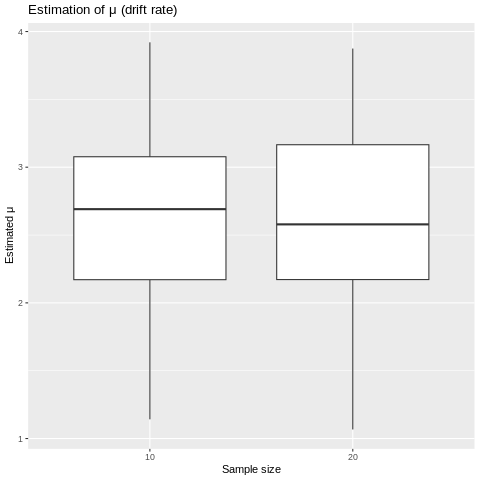

In [ ]:
%%R

ggplot(exwald_results, aes(x = factor(n), y = mu_hat)) +
  geom_boxplot() +
  labs(title = "Estimation of μ (drift rate)", x = "Sample size", y = "Estimated μ")

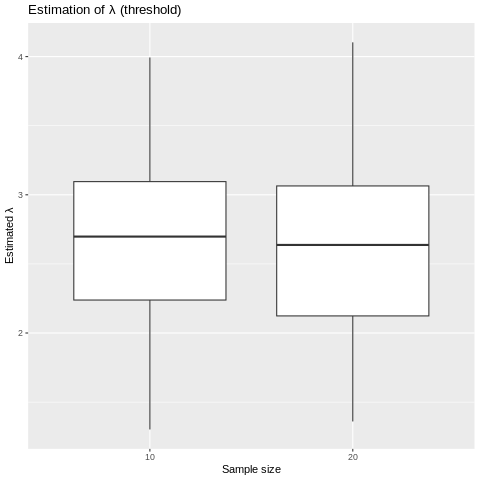

In [ ]:
%%R

ggplot(exwald_results, aes(x = factor(n), y = lambda_hat)) +
  geom_boxplot() +
  labs(title = "Estimation of λ (threshold)", x = "Sample size", y = "Estimated λ")

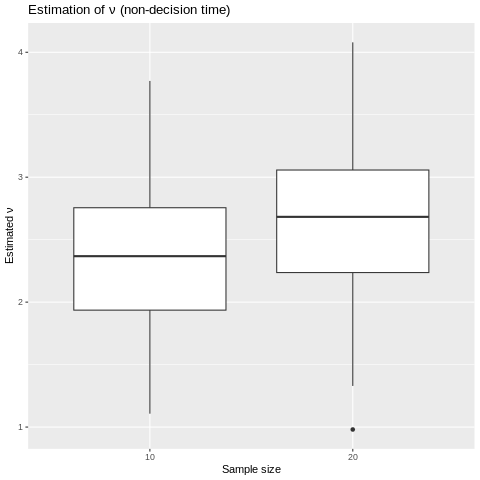

In [ ]:
%%R

ggplot(exwald_results, aes(x = factor(n), y = nu_hat)) +
  geom_boxplot() +
  labs(title = "Estimation of ν (non-decision time)", x = "Sample size", y = "Estimated ν")